In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

### Reading the CSV file

In [13]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.shape

(150, 5)

In [16]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
df.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

### List down the features and their types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Create a histogram for each feature in the dataset.

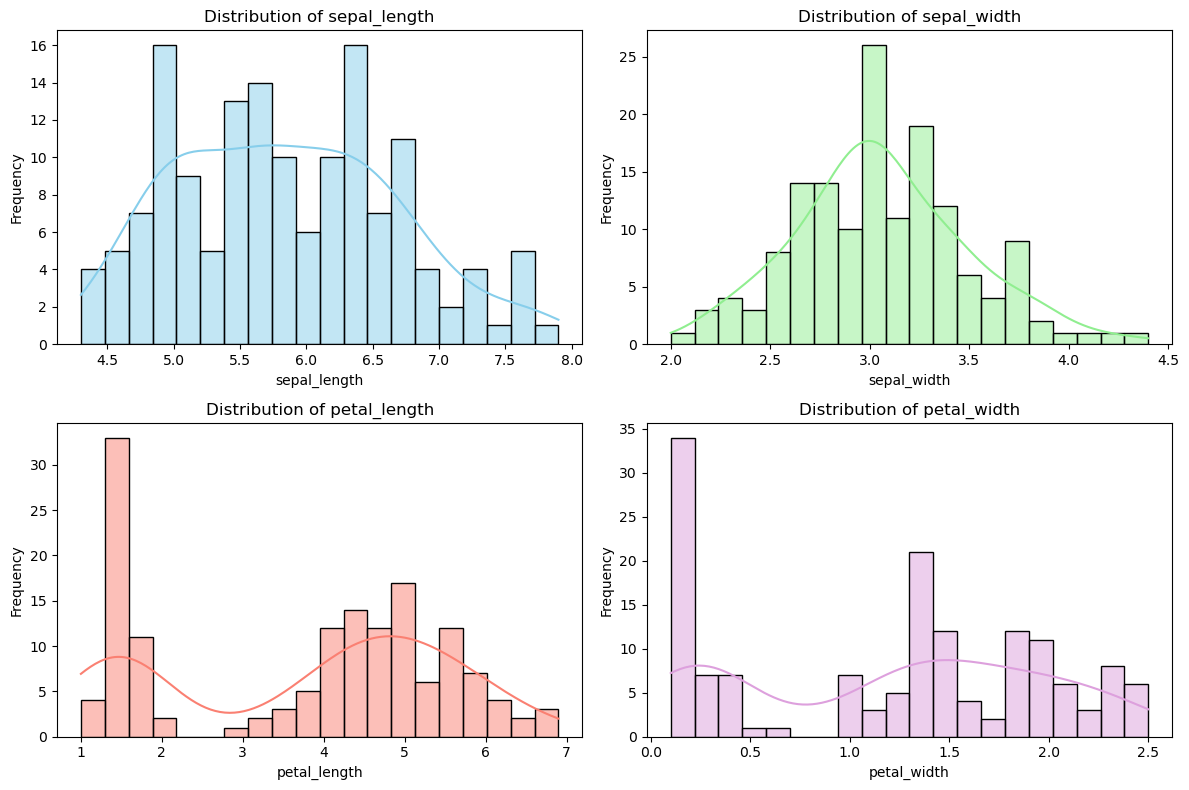

In [30]:
plt.figure(figsize=(12, 8))

# Plot 1: Sepal Length
plt.subplot(2, 2, 1)
sns.histplot(df['sepal_length'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('Frequency')

# Plot 2: Sepal Width
plt.subplot(2, 2, 2)
sns.histplot(df['sepal_width'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('Frequency')

# Plot 3: Petal Length
plt.subplot(2, 2, 3)
sns.histplot(df['petal_length'], kde=True, bins=20, color='salmon')
plt.title('Distribution of petal_length')
plt.xlabel('petal_length')
plt.ylabel('Frequency')

# Plot 4: Petal Width
plt.subplot(2, 2, 4)
sns.histplot(df['petal_width'], kde=True, bins=20, color='plum')
plt.title('Distribution of petal_width')
plt.xlabel('petal_width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Create a box plot for each feature in the dataset

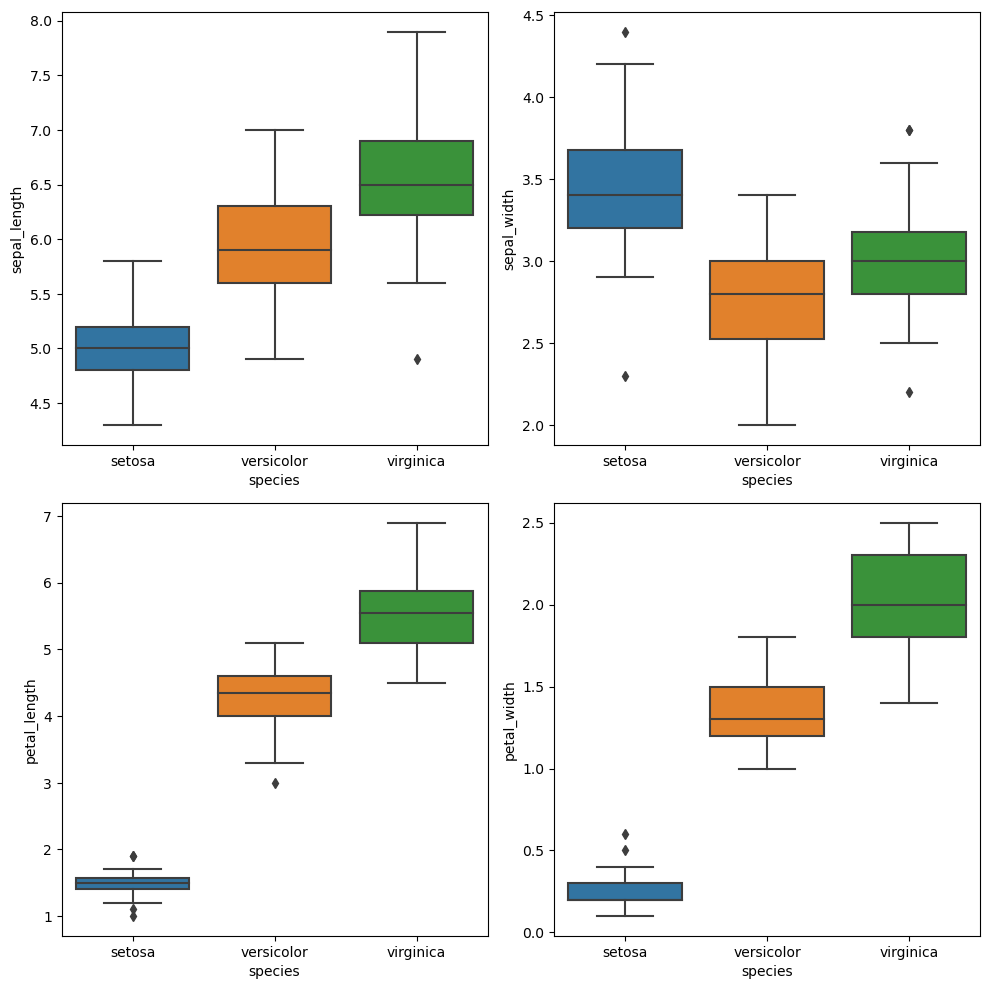

In [23]:
plt.figure(figsize=(10, 10))

# Plot sepal_length
plt.subplot(221)
sns.boxplot(x="species", y="sepal_length", data=df)

# Plot sepal_width
plt.subplot(222)
sns.boxplot(x="species", y="sepal_width", data=df)

# Plot petal_length
plt.subplot(223)
sns.boxplot(x="species", y="petal_length", data=df)

# Plot petal_width
plt.subplot(224)
sns.boxplot(x="species", y="petal_width", data=df)

plt.tight_layout()
plt.show()

### Compare distributions and identify outliers.

In [26]:
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)].shape[0]

# List of columns
columns = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']

# Loop through and print outlier counts
for col in columns:
    print(f"{col}: {count_outliers(col)} outliers")

sepal_width: 4 outliers
sepal_length: 0 outliers
petal_width: 0 outliers
petal_length: 0 outliers
